In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [99]:
df = pd.read_csv('./Dataset/housing.csv')

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [100]:
df.info() #There is only 1 col with Nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: >

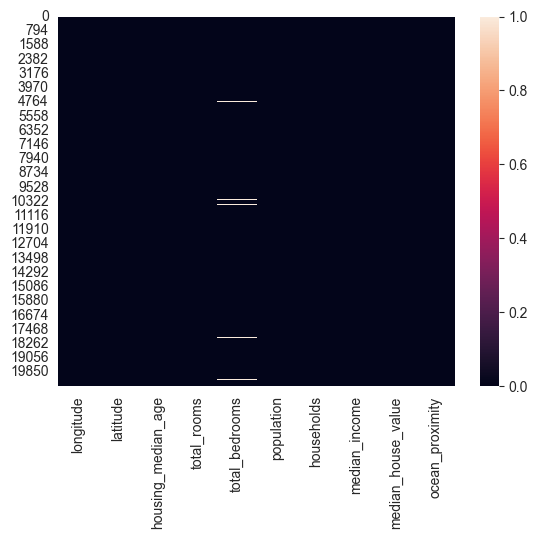

In [101]:
sns.heatmap(df.isna())

In [102]:
#replacing total bedrooms with the mean

df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

C:\Users\victo\AppData\Local\Temp\ipykernel_28992\2299852791.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


<Axes: >

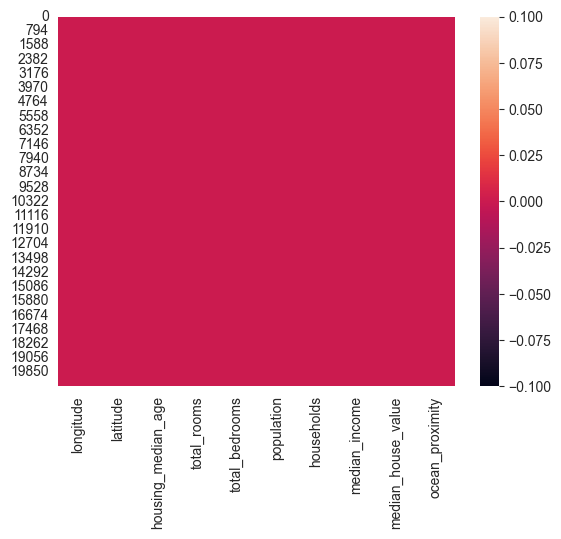

In [103]:
sns.heatmap(df.isna())

## EDA

In [104]:
sns.set_style('whitegrid')

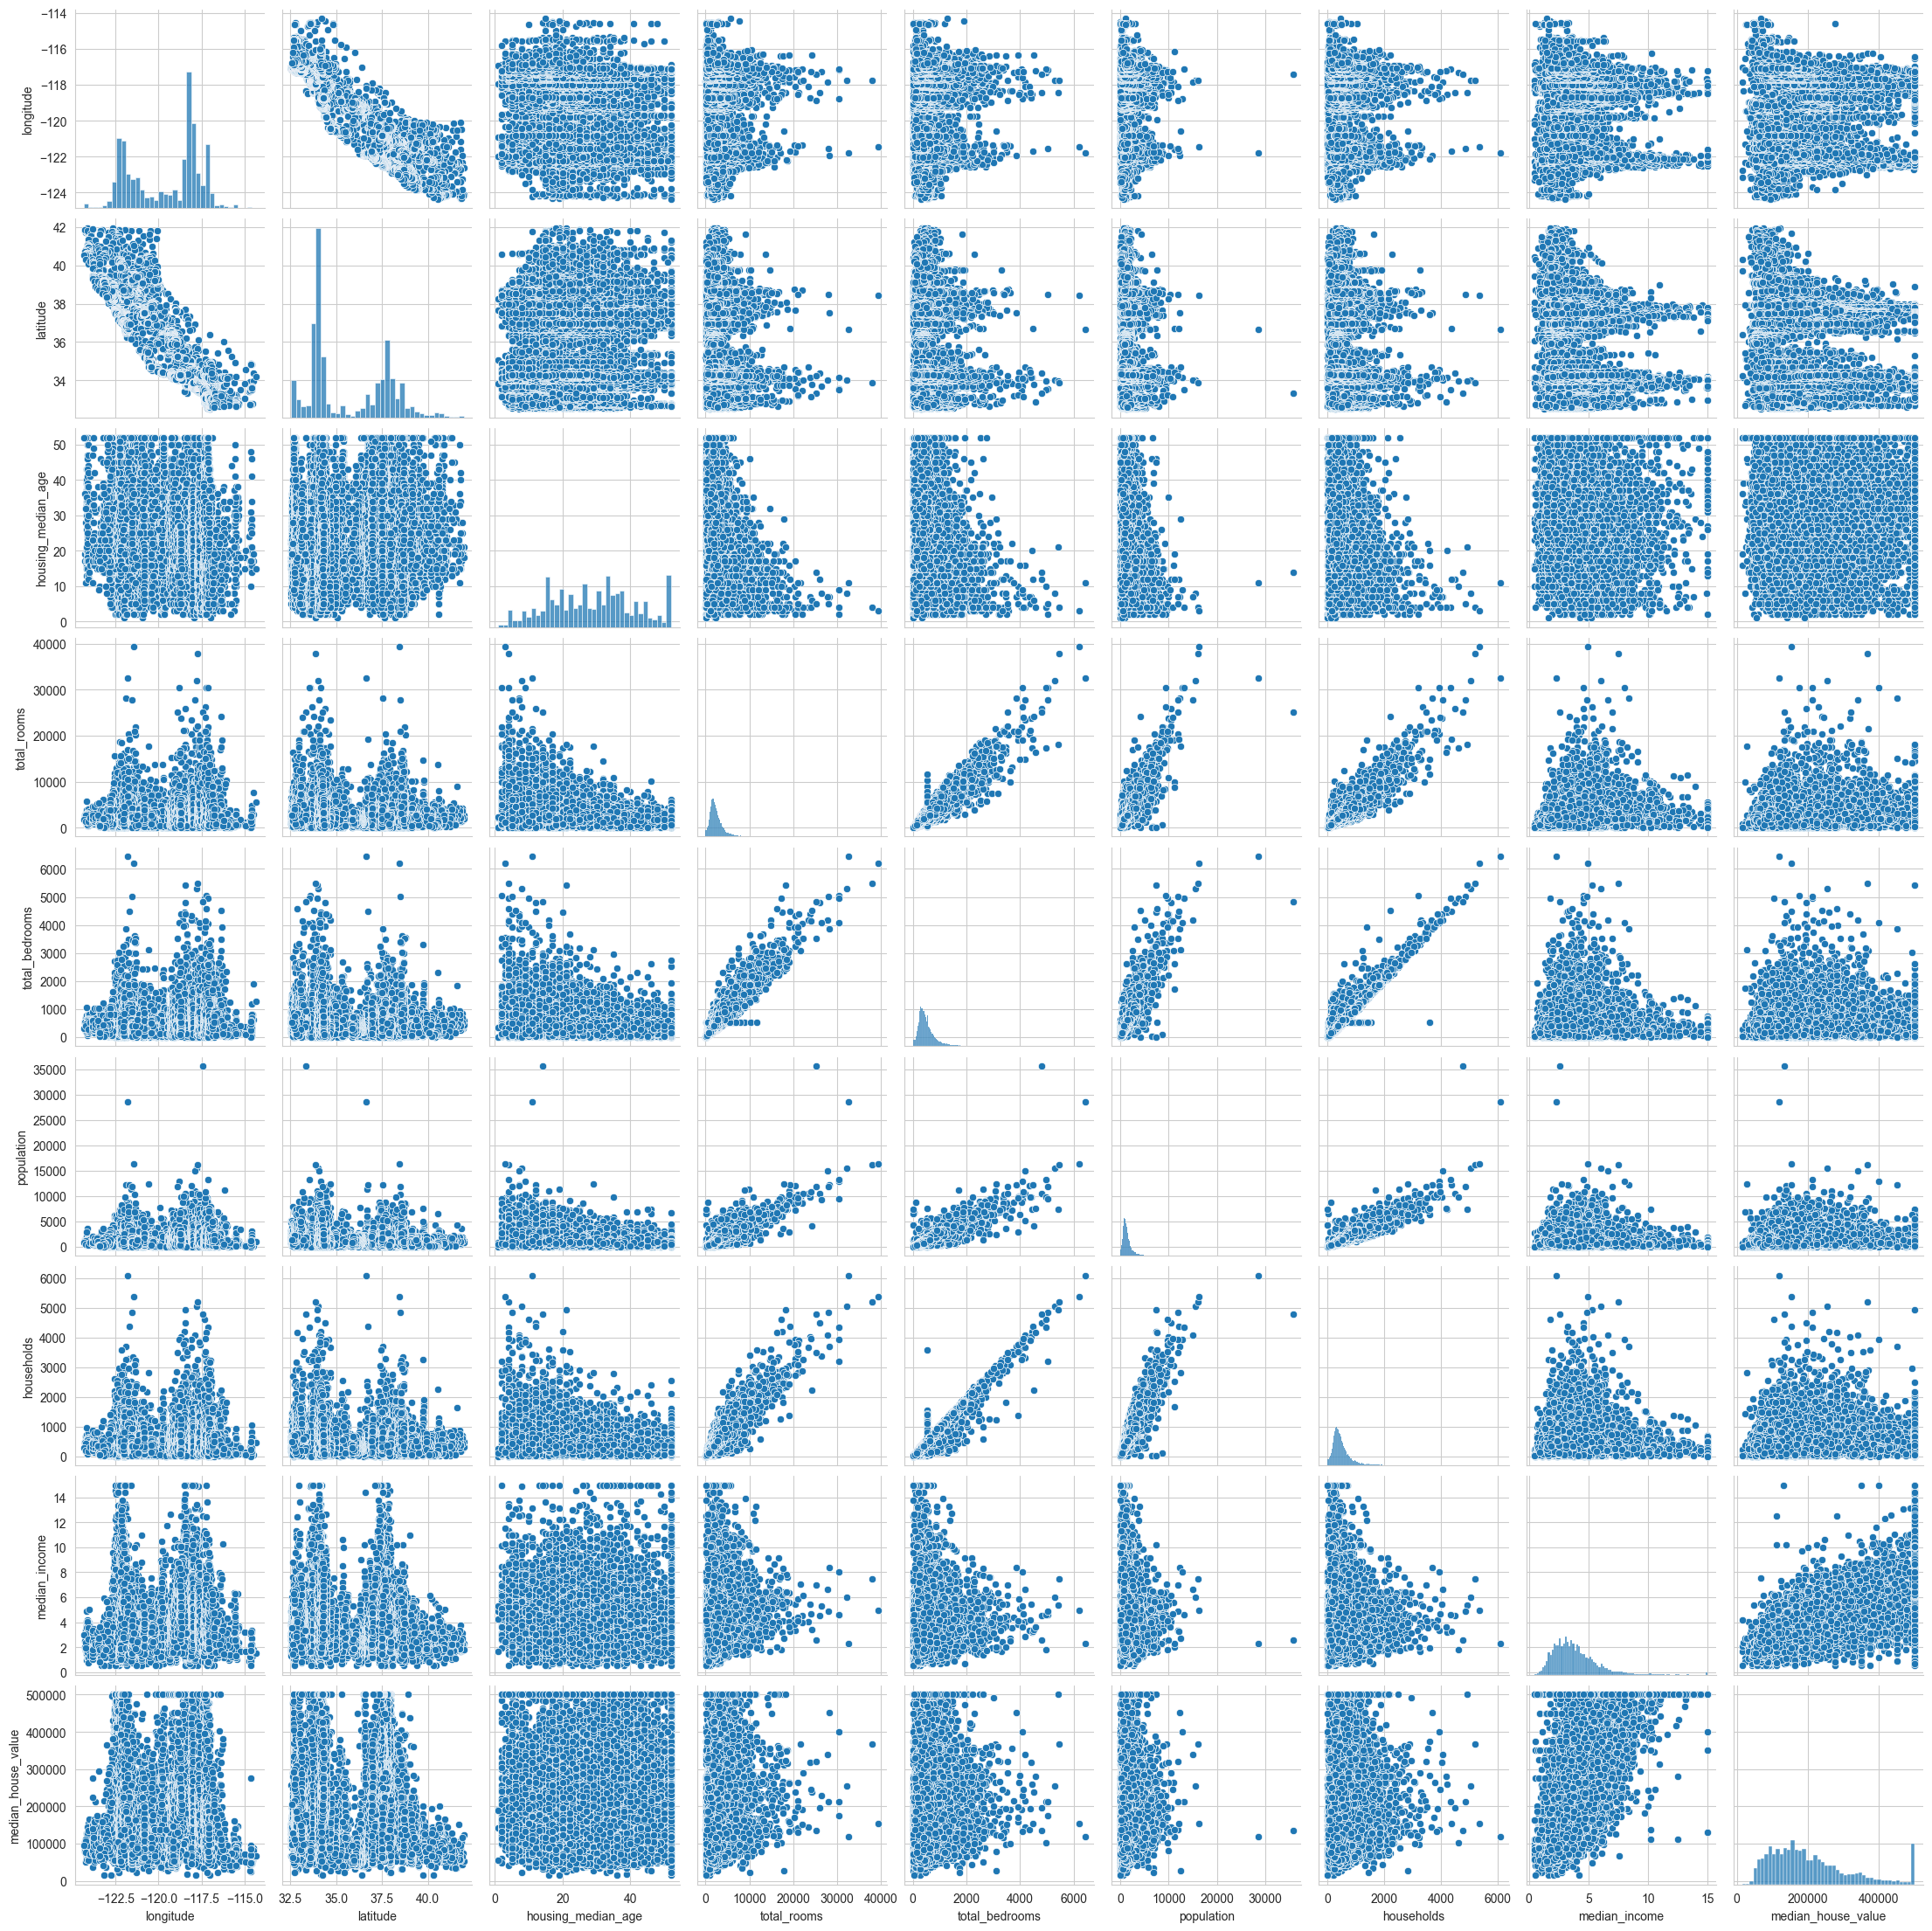

In [105]:
sns.pairplot(df)

In [106]:
df_temp = df.select_dtypes(exclude=['object'])


<Axes: >

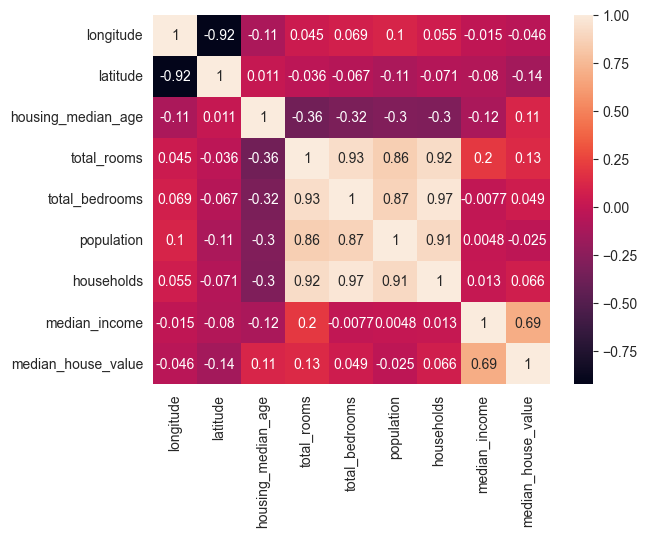

In [107]:
sns.heatmap(df_temp.corr(), annot=True)

In [108]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

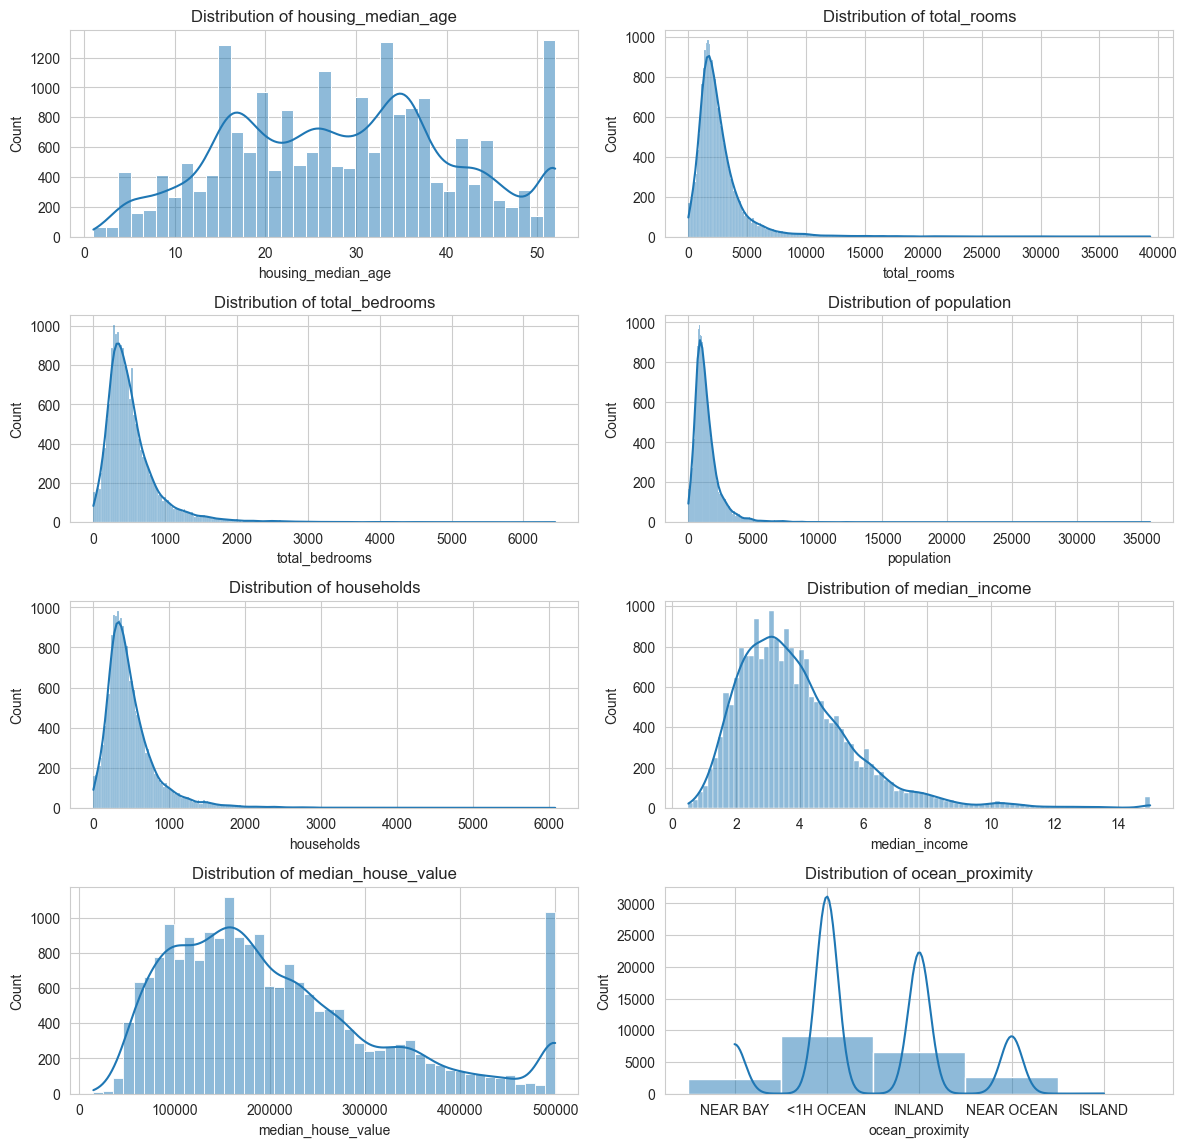

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
df_temp = df.drop(columns=['latitude', 'longitude'])
columns = df_temp.columns

# Set figure size
plt.figure(figsize=(12, 14))

# Loop through columns and create subplots
for i, col in enumerate(columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


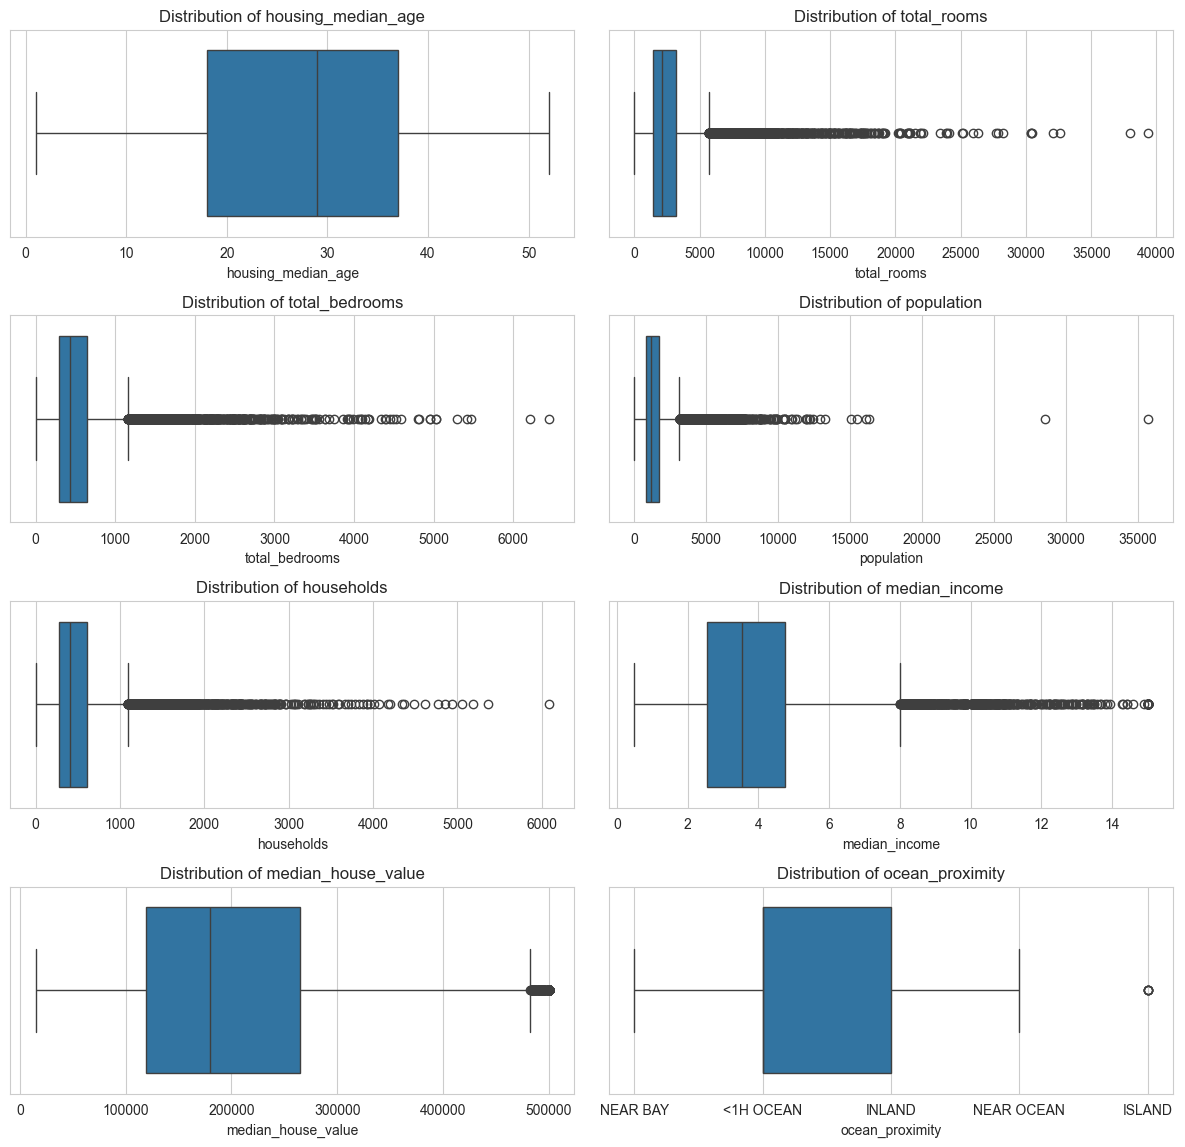

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
df_temp = df.drop(columns=['latitude', 'longitude'])
columns = df_temp.columns

# Set figure size
plt.figure(figsize=(12, 14))

for i, col in enumerate(columns,1):
    plt.subplot(5,2,i)
    sns.boxplot(data=df,x=col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [111]:
df_temp.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

In [112]:
# Removing outliers from the dataset using IQR
df_clean = df.copy()

# List of numeric columns (you can choose specific ones if needed)
cols = df_temp[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value']]

for col in cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower_limit) & (df_clean[col] <= upper_limit)]


df = df_clean    


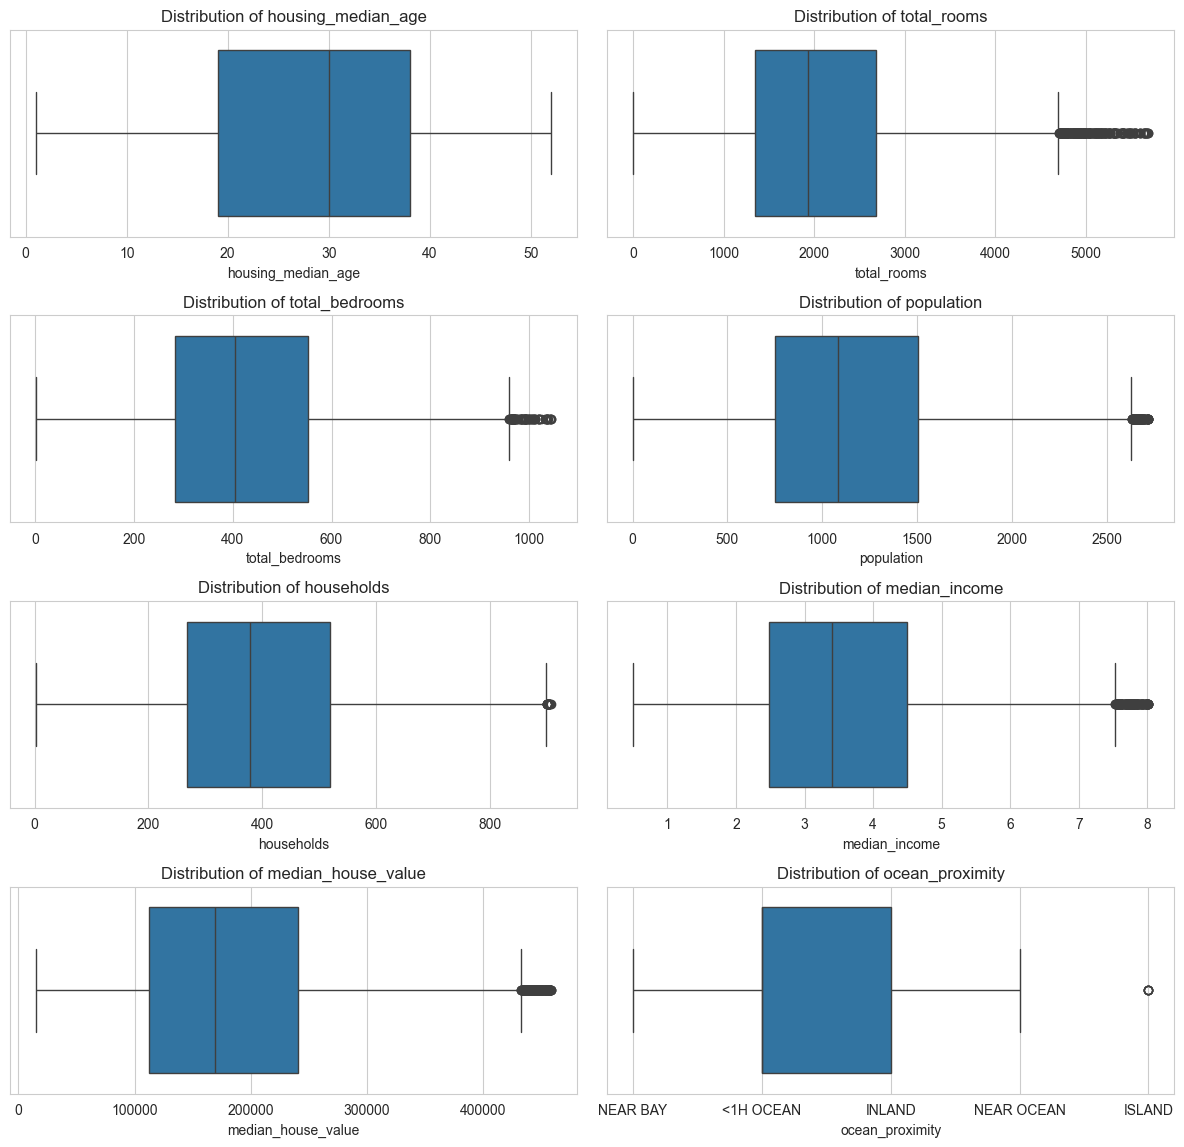

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
df_temp = df.drop(columns=['latitude', 'longitude'])
columns = df_temp.columns

# Set figure size
plt.figure(figsize=(12, 14))

for i, col in enumerate(columns,1):
    plt.subplot(5,2,i)
    sns.boxplot(data=df,x=col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [114]:

# df = df.drop(columns=['total_bedrooms','population','households'])

In [115]:
df2 = df.copy()

## Encoding

In [116]:
df = df2.copy()

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [117]:
from sklearn.preprocessing import OneHotEncoder

oe1 = OneHotEncoder(sparse_output=False)

encoded = oe1.fit_transform(df[['ocean_proximity']])

encoded

df_temp = pd.DataFrame(encoded, columns=oe1.get_feature_names_out(['ocean_proximity']),index=df.index)

df_temp

df.drop(columns='ocean_proximity', inplace=True)

df = pd.concat([df, df_temp], axis=1)


In [118]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


## Train test splits

In [119]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='median_house_value')
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

## Scaling the data

In [120]:
from sklearn.preprocessing import StandardScaler

ss1 = StandardScaler()

ss1.fit(X_train)

X_train = ss1.transform(X_train)
X_test = ss1.transform(X_test)

## Models

### Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()

lr1.fit(X_train,y_train)

predictedVal1 = lr1.predict(X_test)

trainPred = lr1.predict(X_train)

In [122]:
# sns.distplot(y_test-predictedVal1)

from sklearn.metrics import r2_score

from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error

print('---------Train Accuracy----------')
print(r2_score(y_train,trainPred))
print(mean_absolute_error(y_train,trainPred))
print(root_mean_squared_error(y_train,trainPred))
print(mean_squared_error(y_train,trainPred))

---------Train Accuracy----------
0.626273436979079
42131.0962866079
56402.876266868596
3181284451.1756887


In [123]:
# sns.distplot(y_test-predictedVal1)

from sklearn.metrics import r2_score

from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error

print('---------Test Accuracy----------')
print(r2_score(y_test,predictedVal1))
print(mean_absolute_error(y_test,predictedVal1))
print(root_mean_squared_error(y_test,predictedVal1))
print(mean_squared_error(y_test,predictedVal1))

---------Test Accuracy----------
0.6282351501324217
41566.79682578567
55736.59376154615
3106567884.1396255


### SVR

In [124]:
from sklearn.svm import SVR 

svr1 = SVR()

svr1.fit(X_train,y_train)

predictedVal1 = svr1.predict(X_test)

trainPred = svr1.predict(X_train)

C:\Users\victo\AppData\Local\Temp\ipykernel_28992\2904839705.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictedVal1)


<Axes: xlabel='median_house_value', ylabel='Density'>

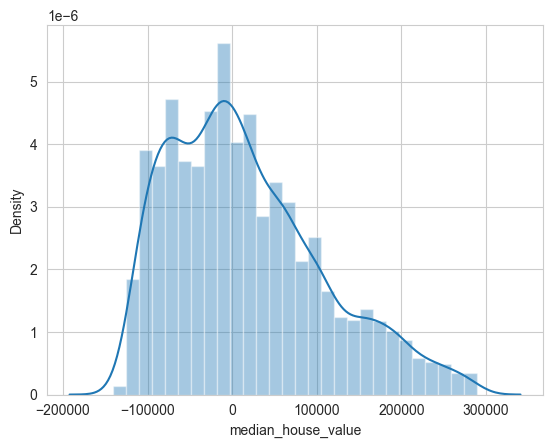

In [125]:
sns.distplot(y_test-predictedVal1)

In [126]:
from sklearn.metrics import r2_score

print('------Train Accuracy---------')
print(r2_score(y_train,trainPred))
print(mean_absolute_error(y_train,trainPred))
print(root_mean_squared_error(y_train,trainPred))
print(mean_squared_error(y_train,trainPred))

------Train Accuracy---------
-0.02460093617592829
73179.28137891542
93390.27239775262
8721742978.526436


In [127]:
from sklearn.metrics import r2_score

print('------Test Accuracy---------')
print(r2_score(y_test,predictedVal1))
print(mean_absolute_error(y_test,predictedVal1))
print(root_mean_squared_error(y_test,predictedVal1))
print(mean_squared_error(y_test,predictedVal1))

------Test Accuracy---------
-0.02291934680925589
72187.53349075132
92454.26659532994
8547791411.680343


### RBF SVR

In [128]:
from sklearn.svm import SVR 

svr1 = SVR(kernel='rbf')

svr1.fit(X_train,y_train)

predictedVal1 = svr1.predict(X_test)

trainPred = svr1.predict(X_train)

C:\Users\victo\AppData\Local\Temp\ipykernel_28992\2904839705.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictedVal1)


<Axes: xlabel='median_house_value', ylabel='Density'>

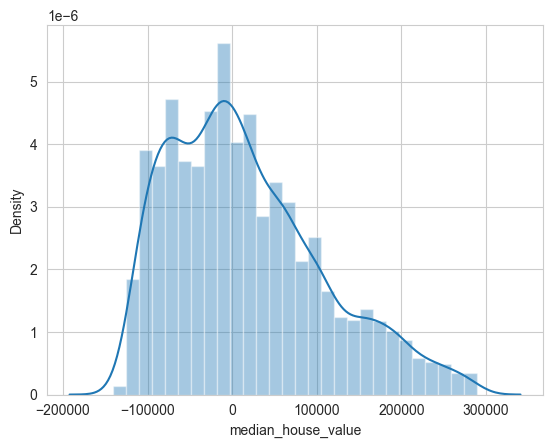

In [129]:
sns.distplot(y_test-predictedVal1)

In [130]:
from sklearn.metrics import r2_score

print('------Train Accuracy---------')
print(r2_score(y_train,trainPred))
print(mean_absolute_error(y_train,trainPred))
print(root_mean_squared_error(y_train,trainPred))
print(mean_squared_error(y_train,trainPred))

------Train Accuracy---------
-0.02460093617592829
73179.28137891542
93390.27239775262
8721742978.526436


In [131]:
from sklearn.metrics import r2_score

print('------Test Accuracy---------')
print(r2_score(y_test,predictedVal1))
print(mean_absolute_error(y_test,predictedVal1))
print(root_mean_squared_error(y_test,predictedVal1))
print(mean_squared_error(y_test,predictedVal1))

------Test Accuracy---------
-0.02291934680925589
72187.53349075132
92454.26659532994
8547791411.680343


### Decision Tree

In [132]:
from sklearn.tree import DecisionTreeRegressor

dtc1 = DecisionTreeRegressor()

dtc1.fit(X_train,y_train)


DecisionTreeRegressor()

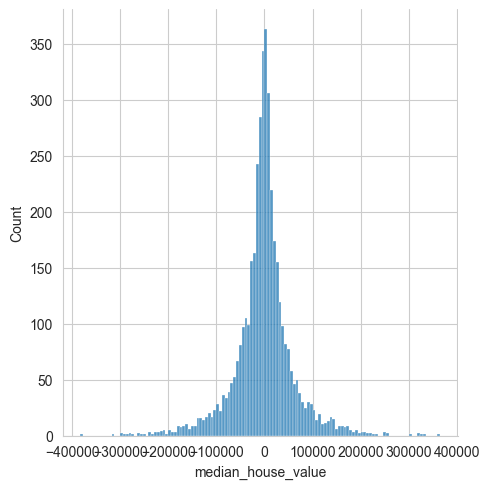

In [133]:
predictedVal1 = dtc1.predict(X_test)

trainPred = dtc1.predict(X_train)

sns.displot(y_test-predictedVal1)

In [134]:

from sklearn.metrics import r2_score

print('------Train Accuracy---------')
print(r2_score(y_train,trainPred))
print(mean_absolute_error(y_train,trainPred))
print(root_mean_squared_error(y_train,trainPred))
print(mean_squared_error(y_train,trainPred))

------Train Accuracy---------
1.0
0.0
0.0
0.0


In [135]:
from sklearn.metrics import r2_score

print('------Test Accuracy---------')
print(r2_score(y_test,predictedVal1))
print(mean_absolute_error(y_test,predictedVal1))
print(root_mean_squared_error(y_test,predictedVal1))
print(mean_squared_error(y_test,predictedVal1))


------Test Accuracy---------
0.5476445341966955
40287.38162878788
61481.74462289599
3780004921.875


Decision tree model is overfitting

### Random Forest

In [136]:
from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor()

rf1.fit(X_train,y_train)

RandomForestRegressor()

C:\Users\victo\AppData\Local\Temp\ipykernel_28992\265496455.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictedVal1)


<Axes: xlabel='median_house_value', ylabel='Density'>

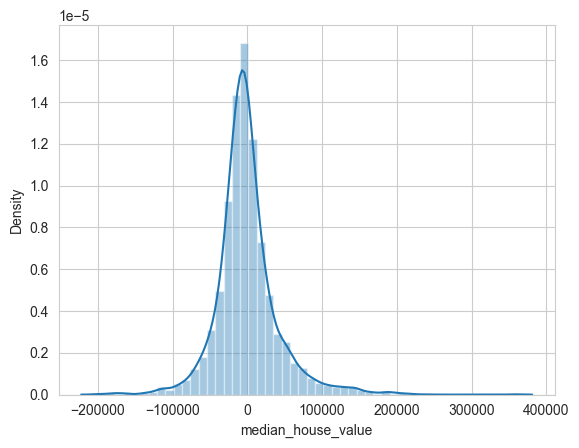

In [137]:
predictedVal1 = rf1.predict(X_test)

trainPred = rf1.predict(X_train)

sns.distplot(y_test-predictedVal1)

In [138]:
from sklearn.metrics import r2_score

print('---------Train Accuracy----------')
print(r2_score(y_train,trainPred))
print(mean_absolute_error(y_train,trainPred))
print(root_mean_squared_error(y_train,trainPred))
print(mean_squared_error(y_train,trainPred))

---------Train Accuracy----------
0.9694765174435642
10847.047548926766
16119.119289219145
259826006.66007668


In [139]:
from sklearn.metrics import r2_score

print('---------Test Accuracy----------')
print(r2_score(y_test,predictedVal1))
print(mean_absolute_error(y_test,predictedVal1))
print(root_mean_squared_error(y_test,predictedVal1))
print(mean_squared_error(y_test,predictedVal1))

---------Test Accuracy----------
0.7923238733088926
28035.65960464015
41658.10873047468
1735398023.0000508


#Random Forest model is also overfitting, we use hyperparameter tuning with grid search to overcome this

In [140]:
#Using Grid Search

from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
}

gs1 = GridSearchCV(estimator=rf1, param_grid=parameters, scoring='r2', cv=10, n_jobs=-1)

gs1.fit(X_train, y_train)

print("Best Parameters:", gs1.best_params_)
print("Best R² Score:", gs1.best_score_)


Best Parameters: {'max_depth': 3, 'n_estimators': 100}
Best R² Score: 0.5350516809583794


In [141]:
from sklearn.metrics import r2_score

print('---------Train Accuracy----------')
print(r2_score(y_train,trainPred))
print(mean_absolute_error(y_train,trainPred))
print(root_mean_squared_error(y_train,trainPred))
print(mean_squared_error(y_train,trainPred))

---------Train Accuracy----------
0.9694765174435642
10847.047548926766
16119.119289219145
259826006.66007668


In [142]:
from sklearn.metrics import r2_score

print('---------Test Accuracy----------')
print(r2_score(y_test,predictedVal1))
print(mean_absolute_error(y_test,predictedVal1))
print(root_mean_squared_error(y_test,predictedVal1))
print(mean_squared_error(y_test,predictedVal1))

---------Test Accuracy----------
0.7923238733088926
28035.65960464015
41658.10873047468
1735398023.0000508


### XGBoost


In [143]:
from xgboost import XGBRegressor

xg1 = XGBRegressor(max_depth=4)


In [144]:
xg1.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [145]:
predictedVal1 = xg1.predict(X_test)

trainPred = xg1.predict(X_train)


# sns.distplot(y_test-predictedVal1)

In [146]:
from sklearn.metrics import r2_score


print('--------Train accuracy----------')
print(r2_score(y_train,trainPred))
print(mean_absolute_error(y_train,trainPred))
print(root_mean_squared_error(y_train,trainPred))
print(mean_squared_error(y_train,trainPred))

--------Train accuracy----------
0.854781598641481
24780.211964616872
35158.88499616533
1236147194.17358


In [147]:
from sklearn.metrics import r2_score

print('--------Test accuracy----------')
print(r2_score(y_test,predictedVal1))
print(mean_absolute_error(y_test,predictedVal1))
print(root_mean_squared_error(y_test,predictedVal1))
print(mean_squared_error(y_test,predictedVal1))

--------Test accuracy----------
0.7983269249012855
28299.23403052128
41051.6125901731
1685234896.2536583


The first is train accuracy, its to check if the model is overfitting or not by comparing it to the test accuracy, the 2nd is the test accuracy but we can get lucky sometime , so to overcome that we use cross val score which gives the means of the test accuracy


<Axes: title={'center': 'Training vs Validation RMSE'}>

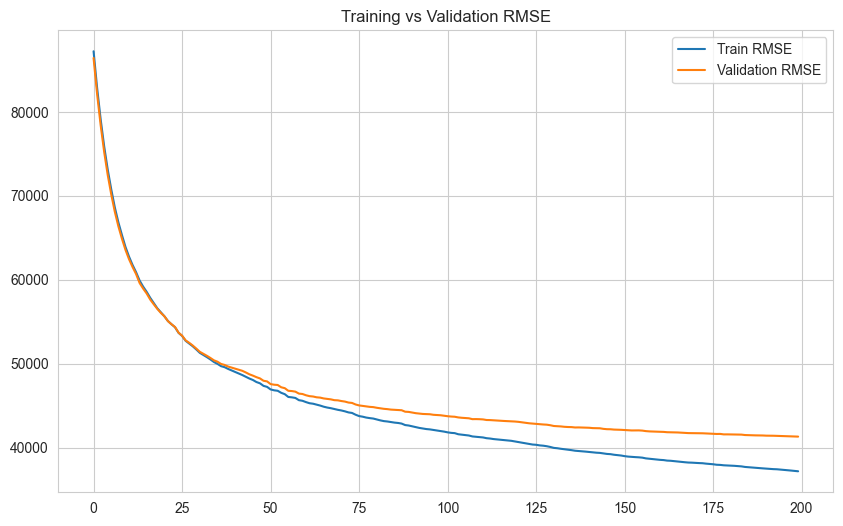

In [148]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


# Instantiate the model
xg1 = XGBRegressor(
    max_depth=4,
    n_estimators=200,
    learning_rate=0.1,
)


# Fit the model with early stopping
xg1.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

# Get training and validation error history
results = xg1.evals_result()

model_loss = pd.DataFrame({
    'Train RMSE': results['validation_0']['rmse'],
    'Validation RMSE': results['validation_1']['rmse']
})

model_loss.plot(figsize=(10,6), title='Training vs Validation RMSE')


### Model Performance Summary

| Model            | Dataset | R² Score | RMSE      |
|------------------|---------|----------|-----------|
| **Linear**       | Train   | 0.628    | 55,736.59 |
|                  | Test    | 0.628    | 55,736.59 |
| **SVR**          | Train   | -0.025   | 93,390.27 |
|                  | Test    | -0.023   | 92,454.27 |
| **RBF SVR**      | Train   | -0.025   | 93,390.27 |
|                  | Test    | -0.023   | 92,454.27 |
| **Decision Tree**| Train   | 1.000    | 0.00      |
|                  | Test    | 0.538    | 62,137.55 |
| **Random Forest**| Train   | 0.969    | 16,183.10 |
|                  | Test    | 0.793    | 41,635.08 |
| **XGBoost**      | Train   | 0.855    | 35,158.88 |
|                  | Test    | 0.798    | 41,051.61 |

---

### Conclusion

- 🔹 **XGBoost**  performed the best overall, with high R² scores and relatively low RMSE on both train and test sets.
- 🔹 **Random Forest and Decision Tree** overfit the training data (R² = 0.96 - 1.0), resulting in weaker generalization.
- 🔸 **SVR** models underperformed, with negative R² values indicating they failed to capture variance in the data.
